In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit


# Logistic function

Shown in the plot is how the logistic regression would, in this
synthetic dataset, classify values as either 0 or 1,
i.e. class one or two, using the logistic curve.


In [100]:
# General a toy dataset:s it's just a straight line with some Gaussian noise:
a1sd_mean  = 5 # 5.8
a1sd_stdev = 2.5

coverage = 1 # Half width of plotting interval as a number of time standard deviation
xmin = math.ceil(a1sd_mean - 4*coverage * a1sd_stdev)
xmax = math.ceil(a1sd_mean + coverage * a1sd_stdev)
print(xmin,xmax)

-5 8


In [103]:
#xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)
# print(X[:])

X = X[:, np.newaxis] # Add axis to have a columnar array (transpode of X?)
#X.shape
#print(X[:,0])

from scipy import stats
stats.describe(X)

DescribeResult(nobs=100, minmax=(array([-2.44006216]), array([9.25439181])), mean=array([1.38868265]), variance=array([7.85499512]), skewness=array([1.02204745]), kurtosis=array([0.18128653]))

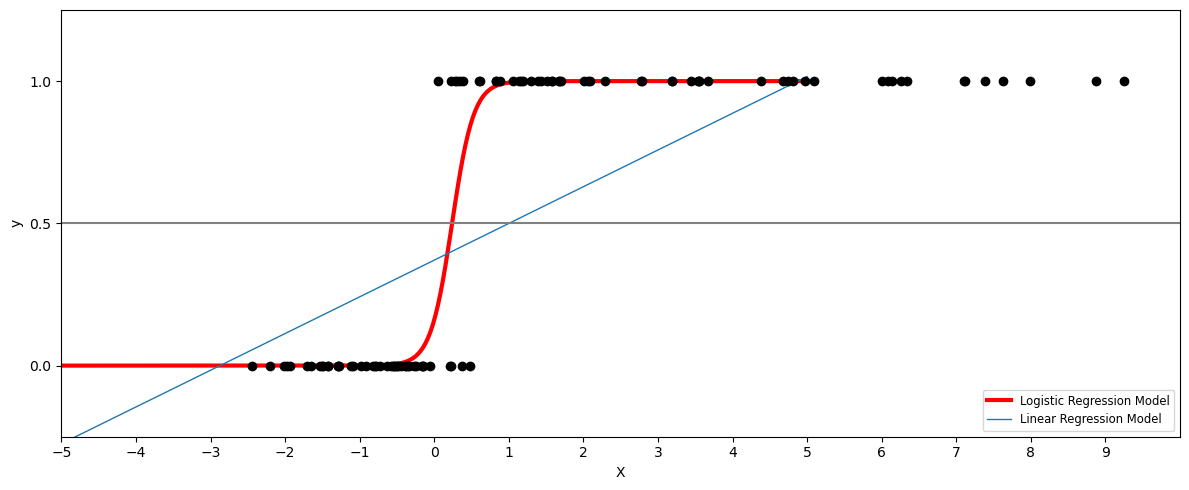

In [104]:
# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(figsize = (12,5), dpi=100)
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(xmin, xmax, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(xmin, 2*xmax))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(xmin, 2*xmax)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()